In [1]:
!pip install PyDrive

In [2]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
download = drive.CreateFile({'id': '1LehLXl5Wg_1Mtp78EmbkDxjoHf6s6nWx'})
download.GetContentFile('plant_disease_dataset.zip')

Unzipping Data folder to content folder called 'dataset'

In [5]:
!unzip -u "/content/plant_disease_dataset.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2

establishing directory paths for train, valid and test

In [6]:
training_dir = '/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

importing necessary libraries and modules

In [7]:
import os
#import cv2 as cv
#import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

listing all classes to which images belong to

In [8]:
os.listdir("/content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train")

['Apple___Apple_scab',
 'Cherry_(including_sour)___healthy',
 'Blueberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Pepper,_bell___Bacterial_spot',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy',
 'Apple___Black_rot',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Potato___Late_blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Grape___Black_rot',
 'Tomato___Leaf_Mold',
 'Tomato___Early_blight',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Apple___Cedar_apple_rust',
 'Strawberry___healthy',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Apple___healthy',
 'Potato___healthy',
 'Potato___Early_blight',
 'Raspberry___healthy',
 'Strawberry___Leaf_scorch',
 'Corn_(maiz

Data preprocessing using built in function called preprocessing_input


In [10]:
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

train_dg = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True, preprocessing_function = preprocess_input)
val_dg = ImageDataGenerator(preprocessing_function = preprocess_input)

train = train_dg.flow_from_directory(directory = training_dir, target_size = (256,256), batch_size = 32)
valid = val_dg.flow_from_directory(directory = valid_dir, target_size = (256,256), batch_size = 32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [19]:
t_img, label = train.next()
t_img.shape

(32, 256, 256, 3)

visualizing data post preprocessing

In [25]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize = (2,2))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


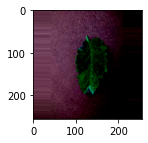

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


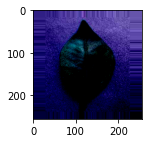

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


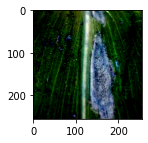

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


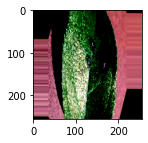

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


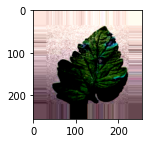

In [24]:
plotImage(t_img[:5], label[:5])

In [27]:
from keras.layers import Dense, Flatten
from keras.models import Model
import keras

creating a base model

In [28]:
base_mdl = VGG19(input_shape = (256,256,3), include_top = False)
for layer in base_mdl.layers:
  layer.trainable = False



80150528/80134624 [==============================] - 0s 0us/step


In [29]:
base_mdl.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

model creation

In [30]:
X = Flatten()(base_mdl.output)
X = Dense(units = 38, activation = 'softmax')(X)

model = Model(base_mdl.input, X)

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

compile model

In [36]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

early stopping and model check point

early stopping - monitor validation accuracy

In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

modelcheckpt = ModelCheckpoint(filepath = 'plant_best_model.h5', monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1, save_best_only = True)

callback = [earlystop, modelcheckpt]

In [37]:
history = model.fit_generator(train, steps_per_epoch = 16, epochs = 50, verbose = 1, callbacks = callback, validation_data=valid, validation_steps = 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 30.0201 - accuracy: 0.1914
Epoch 1: val_accuracy improved from -inf to 0.38477, saving model to plant_best_model.h5
16/16 [==============================] - 28s 828ms/step - loss: 30.0201 - accuracy: 0.1914 - val_loss: 18.8882 - val_accuracy: 0.3848
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 16.2166 - accuracy: 0.4082
Epoch 2: val_accuracy improved from 0.38477 to 0.59766, saving model to plant_best_model.h5
16/16 [==============================] - 13s 818ms/step - loss: 16.2166 - accuracy: 0.4082 - val_loss: 8.9083 - val_accuracy: 0.5977
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.2216 - accuracy: 0.5566
Epoch 3: val_accuracy improved from 0.59766 to 0.66797, saving model to plant_best_model.h5
16/16 [==============================] - 13s 823ms/step - loss: 11.2216 - accuracy: 0.5566 - val_loss: 7.7677 - val_accuracy: 0.6680
Epoch 4/50
16/16 [========================

In [39]:
import pickle
with open('pkl_mdl', 'wb') as file1:
  pickle.dump(model, file1)

INFO:tensorflow:Assets written to: ram://ab84688b-7b2f-4c0b-aa31-e5c9115c545e/assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


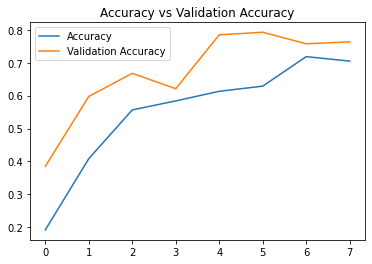

In [47]:
h = history.history
print(h.keys())

plt.plot(h['accuracy'], label = 'Accuracy')
plt.plot(h['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

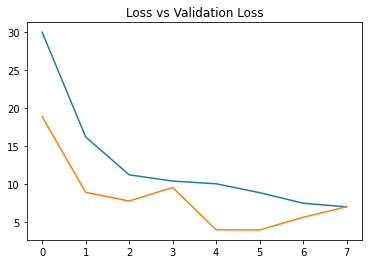

In [48]:
plt.plot(h['loss'], label = "Loss")
plt.plot(h['val_loss'], label = "Validation Loss")
plt.title('Loss vs Validation Loss')
plt.show()

In [49]:
from keras.models import load_model
model = load_model("/content/plant_best_model.h5")


In [51]:
accuracy = model.evaluate_generator(valid)[1]
print(f"Accuracy of best model: {accuracy*100}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy of best model: 78.43159437179565%


In [52]:
def predfunc(path):
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  print(img.shape)
  pred = np.argmax(model.predict(img))
  print(pred)
  

In [53]:
path_test = ('/content/dataset/test/test/AppleCedarRust1.JPG')

predfunc(path_test)

(1, 256, 256, 3)
2


In [55]:
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma